# Bosques de Aislamiento

<Figure size 640x480 with 0 Axes>

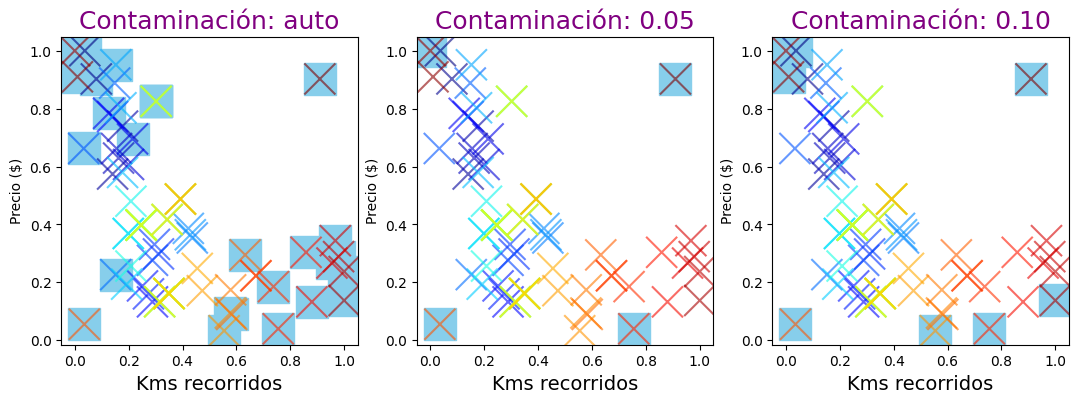

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Cargar datos
carros = np.loadtxt("./carros_usados.csv", delimiter=",")
resultados = np.zeros((3, carros.size//2))

# Bosques de Aislamiento con diferente contaminación
c = ['auto', 0.05, 0.1]
for i in range(len(c)):
    modelo = IsolationForest(contamination=c[i]).fit(carros)
    resultados[i] = modelo.predict(carros)
    
# Graficar datos anómalos 
plt.set_cmap("jet")
fig = plt.figure(figsize=(13, 4))

for i in range(len(c)):    
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(carros[resultados[i]==-1][:, 0], 
               carros[resultados[i]==-1][:, 1], 
               c="skyblue", marker="s", s=500)
    ax.scatter(carros[:, 0], 
               carros[:, 1], 
               c=range(carros.size//2), marker="x",
               s=500, alpha=0.6)
    
    # Título basado en el tipo de contaminación
    if isinstance(c[i], str):
        ax.set_title("Contaminación: %s" % c[i], size=18, color="purple")
    else:
        ax.set_title("Contaminación: %0.2f" % c[i], size=18, color="purple")
    
    ax.set_ylabel("Precio ($)", size=10)
    ax.set_xlabel("Kms recorridos", size=14)

plt.show()